# Analyzing borrowers’ risk of defaulting

Your project is to prepare a report for a bank’s loan division. You’ll need to find out if a customer’s marital status and number of children has an impact on whether they will default on a loan. The bank already has some data on customers’ credit worthiness.

Your report will be considered when building the **credit score** of a potential customer. The **credit score** is used to evaluate the ability of a potential borrower to repay their loan.

[In this notebook you're provided with hints and brief instructions and thinking prompts. Don't ignore them as they are designed to equip you with the structure for the project and will help you analyze what you're doing on a deeper level. Before submitting your project, make sure you remove all hints and descriptions provided to you. Instead, make this report look as if you're sending it to your teammates to demonstrate your findings - they shouldn't know you had some external help from us! To help you out, we've placed the hints you should remove in square brackets.]

[Before you dive into analyzing your data, explain the purposes of the project and hypotheses you're going to test.]

## Open the data file and have a look at the general information. 

[Start with importing the libraries and loading the data. You may realise that you need additional libraries as you go, which is totally fine - just make sure to update this section when you do.]

In [1]:
# Loading all the libraries


# Load the data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

credit_score = pd.read_csv('/datasets/credit_scoring_eng.csv')



## Task 1. Data exploration

**Description of the data**
- `children` - the number of children in the family
- `days_employed` - work experience in days
- `dob_years` - client's age in years
- `education` - client's education
- `education_id` - education identifier
- `family_status` - marital status
- `family_status_id` - marital status identifier
- `gender` - gender of the client
- `income_type` - type of employment
- `debt` - was there any debt on loan repayment
- `total_income` - monthly income
- `purpose` - the purpose of obtaining a loan



In [2]:
# Let's see how many rows and columns our dataset has
credit_score.shape

(21525, 12)

In [3]:
# let's print the first N rows

credit_score.head(15)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house
1,1,-4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase
2,0,-5623.422610,33,Secondary Education,1,married,0,M,employee,0,23341.752,purchase of the house
3,3,-4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding
5,0,-926.185831,27,bachelor's degree,0,civil partnership,1,M,business,0,40922.170,purchase of the house
6,0,-2879.202052,43,bachelor's degree,0,married,0,F,business,0,38484.156,housing transactions
7,0,-152.779569,50,SECONDARY EDUCATION,1,married,0,M,employee,0,21731.829,education
8,2,-6929.865299,35,BACHELOR'S DEGREE,0,civil partnership,1,F,employee,0,15337.093,having a wedding
9,0,-2188.756445,41,secondary education,1,married,0,M,employee,0,23108.150,purchase of the house for my family


In [4]:
# Get info on data
credit_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


In [5]:
# Let's look at the filtered table with missing values in the the first column with missing data
credit_score[credit_score['days_employed'].isnull()]


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,NaN,65,secondary education,1,civil partnership,1,M,retiree,0,NaN,to have a wedding
26,0,NaN,41,secondary education,1,married,0,M,civil servant,0,NaN,education
29,0,NaN,63,secondary education,1,unmarried,4,F,retiree,0,NaN,building a real estate
41,0,NaN,50,secondary education,1,married,0,F,civil servant,0,NaN,second-hand car purchase
55,0,NaN,54,secondary education,1,civil partnership,1,F,retiree,1,NaN,to have a wedding
...,...,...,...,...,...,...,...,...,...,...,...,...
21489,2,NaN,47,Secondary Education,1,married,0,M,business,0,NaN,purchase of a car
21495,1,NaN,50,secondary education,1,civil partnership,1,F,employee,0,NaN,wedding ceremony
21497,0,NaN,48,BACHELOR'S DEGREE,0,married,0,F,business,0,NaN,building a property
21502,1,NaN,42,secondary education,1,married,0,F,employee,0,NaN,building a real estate


In [6]:
credit_score.isnull().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

The data contains 21525 rows and 12 columns.
There are 2174 values missing the 'days_employed and 'total_income' columns. Seeing as how the information is missing on both of the columns I would assume clients refused to submit that information or it was a system error as this information is required for a loan approval.
The values in days_employed are negative which can be a error by the system.
The values in the education columns are written differently. 

In [7]:
# Let's apply multiple conditions for filtering data and look at the number of rows in the filtered table.
credit_score.loc[ (credit_score['days_employed'] == 'NaN') & (credit_score['total_income'] == 'NaN')]
print(credit_score.loc[ (credit_score['days_employed'] == 'Nan') & (credit_score['total_income'] == 'NaN')])

Empty DataFrame
Columns: [children, days_employed, dob_years, education, education_id, family_status, family_status_id, gender, income_type, debt, total_income, purpose]
Index: []


In [8]:
credit_score.isnull().sum()/len(credit_score) * 100

children             0.000000
days_employed       10.099884
dob_years            0.000000
education            0.000000
education_id         0.000000
family_status        0.000000
family_status_id     0.000000
gender               0.000000
income_type          0.000000
debt                 0.000000
total_income        10.099884
purpose              0.000000
dtype: float64

**Intermediate conclusion**
The missing values are symmetric,the rows in the filtered table match the number of missing values. This was calculated by finding the number of missing values in the dataframe and finding the total of missing values in a column. 10.1% percent of the data is missing from days_employed and total_income column.
The missing data could be to many identifying characteristics such as education, family status, or family size.
Lets review below:

In [9]:
# Let's investigate clients who do not have data on identified characteristic and the column with the missing values
print(credit_score.groupby(['education_id'])['days_employed'].apply(lambda x: x.isnull().sum()))

education_id
0     544
1    1540
2      69
3      21
4       0
Name: days_employed, dtype: int64


In [10]:
# Checking distribution
grouped_sample = credit_score.groupby(['education_id']) ['days_employed'].apply(lambda x: x.isnull().value_counts())
pd.DataFrame(grouped_sample).reset_index()

,education_id,level_1,days_employed
0,0,False,4716
1,0,True,544
2,1,False,13693
3,1,True,1540
4,2,False,675
5,2,True,69
6,3,False,261
7,3,True,21
8,4,False,6


<AxesSubplot:xlabel='education_id,None'>

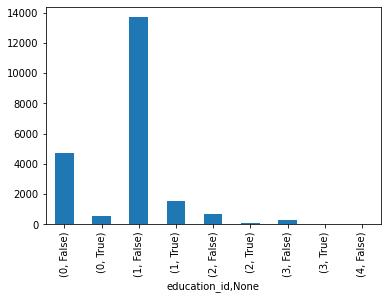

In [11]:
grouped_sample.plot(x='education_id', y='days_employed', kind='bar')


**Possible reasons for missing values in data**

As shown above majority of the data missing on both columns are from clients with a secondary education.

In [12]:
# Checking the distribution in the whole dataset

credit_score.value_counts()

children  days_employed   dob_years  education            education_id  family_status      family_status_id  gender  income_type    debt  total_income  purpose                                 
-1        -9851.184337    44         secondary education  1             divorced           3                 F       employee       0     17758.530     to own a car                                1
 1        -7117.338200    42         secondary education  1             married            0                 F       civil servant  0     36511.880     housing renovation                          1
          -7137.319761    35         secondary education  1             married            0                 F       employee       0     20696.434     property                                    1
          -7146.299384    50         bachelor's degree    0             married            0                 F       employee       0     16782.180     housing transactions                        1
          -7152

In [13]:
# Check for other reasons and patterns that could lead to missing values
credit_score.groupby(['family_status_id'])['days_employed'].apply(lambda x: x.isnull().sum())


family_status_id
0    1237
1     442
2      95
3     112
4     288
Name: days_employed, dtype: int64

**Intermediate conclusion**

It seems that majority of the data was ommited from clients who are married but not a smuch with those who have a secondary education.

**Conclusions**

 I can't exactly say what characteristic is to blame for the missing values- we may have to ask the clients or whoever pulled this data. The total_income will be filled using the the different income types- a student will not be earning the same as somoeone who is an entrepreneur or someone who is retired.

## Data transformation



In [14]:
# Let's see all values in education column to check if and what spellings will need to be fixed
credit_score['education'].unique()

array(["bachelor's degree", 'secondary education', 'Secondary Education',
       'SECONDARY EDUCATION', "BACHELOR'S DEGREE", 'some college',
       'primary education', "Bachelor's Degree", 'SOME COLLEGE',
       'Some College', 'PRIMARY EDUCATION', 'Primary Education',
       'Graduate Degree', 'GRADUATE DEGREE', 'graduate degree'],
      dtype=object)

In [15]:
# Fix the registers if required
credit_score['education'] = credit_score['education'].str.lower()

In [16]:
# Checking all the values in the column to make sure we fixed them

credit_score['education'].unique()

array(["bachelor's degree", 'secondary education', 'some college',
       'primary education', 'graduate degree'], dtype=object)

In [17]:
# Let's see the distribution of values in the `children` column
credit_score['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5])

There are invalid values of -1 and 20 in the children's column. I would assume this was simple human error and their intention were to type 1 and 2.

In [18]:
# [fix the data based on your decision]
credit_score['children'] = credit_score['children'].replace(-1, 1)
credit_score['children'] = credit_score['children'].replace(20, 2)

In [19]:
# Checking the `children` column again to make sure it's all fixed

credit_score['children'].unique()

array([1, 0, 3, 2, 4, 5])

From reviewing the data above I noticed that days_employed column had many negative values apart from the missing ones.

In [20]:
credit_score[credit_score['days_employed'] < 0]['days_employed'].count()

15906

In [21]:
credit_score[credit_score['days_employed'] > 75* 365]['days_employed'].apply(lambda x:x /365).describe()

count    3445.000000
mean     1000.011808
std        57.739771
min       900.626632
25%       949.697024
50%      1000.584401
75%      1049.990258
max      1100.699727
Name: days_employed, dtype: float64

 The are 15906 negative values in the days_employed columns, that is too large of a data to drop. The most ideal way to fix this issue is by turning the negative values into positive values.

In [22]:
# Check the result - make sure it's fixed
credit_score['days_employed'] = credit_score['days_employed'].abs()
credit_score[credit_score['days_employed'] < 0]['days_employed'].count()

0

In [23]:
# Check the `dob_years` for suspicious values and count the percentage

print(credit_score['dob_years'].unique())
print()

print(credit_score[credit_score['dob_years'] <= 0].shape[0]/ credit_score.shape[0] * 100)

[42 36 33 32 53 27 43 50 35 41 40 65 54 56 26 48 24 21 57 67 28 63 62 47
 34 68 25 31 30 20 49 37 45 61 64 44 52 46 23 38 39 51  0 59 29 60 55 58
 71 22 73 66 69 19 72 70 74 75]

0.4692218350754936


As shown above the data for dob_years ranges from 0 to 75 years. No one can be 0 years old and applying for a loan.The 0 values will be replaced with the median of dob_years.

In [24]:
# Address the issues in the `dob_years` column, if they exist
credit_score.loc[credit_score['dob_years'] == 0, 'dob_years']= credit_score['dob_years'].median()

In [25]:
# Check the result - make sure it's fixed
credit_score['dob_years'].unique()

array([42., 36., 33., 32., 53., 27., 43., 50., 35., 41., 40., 65., 54.,
       56., 26., 48., 24., 21., 57., 67., 28., 63., 62., 47., 34., 68.,
       25., 31., 30., 20., 49., 37., 45., 61., 64., 44., 52., 46., 23.,
       38., 39., 51., 59., 29., 60., 55., 58., 71., 22., 73., 66., 69.,
       19., 72., 70., 74., 75.])

In [26]:
# Let's see the values for the column
credit_score['family_status'].unique()

array(['married', 'civil partnership', 'widow / widower', 'divorced',
       'unmarried'], dtype=object)

There are no errors in the family_status column.

In [27]:
# Let's see the values in the column
credit_score['gender'].unique()

array(['F', 'M', 'XNA'], dtype=object)

In [28]:
credit_score['gender'].value_counts()

F      14236
M       7288
XNA        1
Name: gender, dtype: int64

There is a one unique gender,'XNA', in the data. As there is only one, we can drop it without having any effect on our data.

In [29]:
# Address the problematic values, if they exist
unique_gender = credit_score[(credit_score['gender'] == 'XNA')].index
credit_score = credit_score.drop(unique_gender)

In [30]:
# Check the result - make sure it's fixed
credit_score['gender'].unique()

array(['F', 'M'], dtype=object)

In [31]:
# Let's see the values in the column
credit_score['income_type'].value_counts()

employee                       11119
business                        5084
retiree                         3856
civil servant                   1459
unemployed                         2
entrepreneur                       2
student                            1
paternity / maternity leave        1
Name: income_type, dtype: int64

No erroneous data found in the income_type column.

In [34]:
# Checking duplicates
credit_score.duplicated().sum()

72

There are 72 duplicates in the column that will be dropped.

In [35]:
# Address the duplicates, if they exist
credit_score = credit_score.drop_duplicates().reset_index(drop=True)

In [36]:
# Last check whether we have any duplicates
credit_score.duplicated().sum()

0

In [37]:
# Check the size of the dataset that you now have after your first manipulations with it
credit_score.shape

(21452, 12)

In [38]:
percent_removed = (21525-21452)/21525
print(f'The percent of rows removed from the dataset is {percent_removed:.2%}')

The percent of rows removed from the dataset is 0.34%


34% of the data has now been removed and have 21452 rows in our data.

# Working with missing values

In [39]:
# Find the dictionaries
dict(zip(credit_score['education_id'], credit_score['family_status_id']))

{0: 1, 1: 0, 2: 4, 3: 1, 4: 3}

### Restoring missing values in `total_income`

In [40]:
# Let's write a function that calculates the age category
def age_group(age):
    if age <= 30:
        return 'young adult'
    if age <=64:
        return 'adult'
    return 'retired'
    

In [41]:
# Test if the function works
print(age_group(27))
print(age_group(71))
print(age_group(55))

young adult
retired
adult


In [42]:
# Creating new column based on function
credit_score['age_group'] = credit_score['dob_years'].apply(age_group)
credit_score.head(5)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_group
0,1,8437.673028,42.0,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house,adult
1,1,4024.803754,36.0,secondary education,1,married,0,F,employee,0,17932.802,car purchase,adult
2,0,5623.422610,33.0,secondary education,1,married,0,M,employee,0,23341.752,purchase of the house,adult
3,3,4124.747207,32.0,secondary education,1,married,0,M,employee,0,42820.568,supplementary education,adult
4,0,340266.072047,53.0,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding,adult


In [43]:
# Checking how values in the new column

credit_score['age_group']

0          adult
1          adult
2          adult
3          adult
4          adult
          ...   
21447      adult
21448    retired
21449      adult
21450      adult
21451      adult
Name: age_group, Length: 21452, dtype: object

In [44]:
# Create a table without missing values and print a few of its rows to make sure it looks fine
credit_score_not_missing = credit_score.dropna(axis='rows').reset_index(drop=True)
credit_score_not_missing.head(15)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_group
0,1,8437.673028,42.0,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house,adult
1,1,4024.803754,36.0,secondary education,1,married,0,F,employee,0,17932.802,car purchase,adult
2,0,5623.422610,33.0,secondary education,1,married,0,M,employee,0,23341.752,purchase of the house,adult
3,3,4124.747207,32.0,secondary education,1,married,0,M,employee,0,42820.568,supplementary education,adult
4,0,340266.072047,53.0,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding,adult
5,0,926.185831,27.0,bachelor's degree,0,civil partnership,1,M,business,0,40922.170,purchase of the house,young adult
6,0,2879.202052,43.0,bachelor's degree,0,married,0,F,business,0,38484.156,housing transactions,adult
7,0,152.779569,50.0,secondary education,1,married,0,M,employee,0,21731.829,education,adult
8,2,6929.865299,35.0,bachelor's degree,0,civil partnership,1,F,employee,0,15337.093,having a wedding,adult
9,0,2188.756445,41.0,secondary education,1,married,0,M,employee,0,23108.150,purchase of the house for my family,adult


In [45]:
# Look at the mean values for income based on your identified factors
credit_score.pivot_table(index='age_group', values='total_income',aggfunc='mean')

,total_income
age_group,
adult,27285.689569
retired,21542.650450
young adult,25815.651899


In [46]:
# Look at the median values for income based on your identified factors
credit_score.pivot_table(index='age_group', values='total_income',aggfunc='median')

,total_income
age_group,
adult,23546.495
retired,18471.391
young adult,22955.474


In [47]:
credit_score.pivot_table(index='income_type', values='total_income',aggfunc='mean')

,total_income
income_type,
business,32386.741818
civil servant,27343.729582
employee,25820.841683
entrepreneur,79866.103000
paternity / maternity leave,8612.661000
retiree,21940.394503
student,15712.260000
unemployed,21014.360500


In [48]:
credit_score.pivot_table(index='income_type', values='total_income',aggfunc='median')

,total_income
income_type,
business,27571.0825
civil servant,24071.6695
employee,22815.1035
entrepreneur,79866.1030
paternity / maternity leave,8612.6610
retiree,18962.3180
student,15712.2600
unemployed,21014.3605


Missing values in total_income could be due to many factors. It can be due to to clients age, education level, gender, income type and family size. Above we created age categories but I think it makes more sense to fill the missing values by income type instead and using the median for each income type.


In [49]:
#  Write a function that we will use for filling in missing values
        
def fill_total_income(income_type):
    
    if income_type == 'business':
        return 27571.0825
    if income_type == 'civil servant':
        return 24071.6695
    if income_type == 'employee':
        return 22815.1035
    if income_type == 'entrepreneur':
        return 79866.1030
    if income_type == 'paternity / maternity leave':
        return 8612.6610
    if income_type == 'retiree':
        return 18962.3180
    if income_type == 'student':
        return 15712.2600
    return 21014.3605
    

In [50]:
# Check if it works
print(fill_total_income('business'))
print(fill_total_income('civil servant'))
print(fill_total_income('employee'))
print(fill_total_income('paternity / maternity leave'))
print(fill_total_income('retiree'))
print(fill_total_income('unemployed'))
print(fill_total_income('student'))
print(fill_total_income('entrepreneur'))

27571.0825
24071.6695
22815.1035
8612.661
18962.318
21014.3605
15712.26
79866.103


In [51]:
# Apply it to every row
missing_total_income = credit_score['total_income'].isnull()
credit_score.loc[missing_total_income,'total_income'] = credit_score.loc[missing_total_income, 'income_type'].apply(fill_total_income)

In [52]:
# Check if we got any errors
credit_score['total_income'].isna().sum()

0

In [54]:
# Checking the number of entries in the columns

len(credit_score['total_income'])

21452

###  Restoring values in `days_employed`

In [55]:
# Distribution of `days_employed` medians based on your identified parameters

credit_score.pivot_table(index='age_group', values='days_employed',aggfunc='median')


,days_employed
age_group,
adult,2547.442796
retired,360304.232308
young adult,1045.752744


In [56]:
# Distribution of `days_employed` means based on your identified parameters
credit_score.pivot_table(index='age_group', values='days_employed',aggfunc='mean')

,days_employed
age_group,
adult,67984.811974
retired,314080.528722
young adult,2027.056395


In [57]:
# Let's write a function that calculates means or medians (depending on your decision) based on your identified parameter
def fill_days_employed(age_group):
    
    if age_group == 'adult':
        return 2547.442796
    if age_group == 'retired':
        return 360304.232308
    return 1045.752744

In [58]:
# Check that the function works
print(fill_days_employed('adult'))
print(fill_days_employed('young adult'))
print(fill_days_employed('retired'))

2547.442796
1045.752744
360304.232308


In [59]:
# Apply function to the income_type

missing_days_employed = credit_score['days_employed'].isnull()
credit_score.loc[missing_days_employed,'days_employed'] = credit_score.loc[missing_days_employed, 'age_group'].apply(fill_days_employed)

In [60]:
# Check if function worked

credit_score.days_employed.head(15)

0       8437.673028
1       4024.803754
2       5623.422610
3       4124.747207
4     340266.072047
5        926.185831
6       2879.202052
7        152.779569
8       6929.865299
9       2188.756445
10      4171.483647
11       792.701887
12    360304.232308
13      1846.641941
14      1844.956182
Name: days_employed, dtype: float64

In [62]:
# Check the entries in all columns - make sure we fixed all missing values
credit_score.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
age_group           0
dtype: int64

## Categorization of data

In [63]:
# Print the values for your selected data for categorization
credit_score['family_status'].value_counts()

married              12339
civil partnership     4149
unmarried             2810
divorced              1195
widow / widower        959
Name: family_status, dtype: int64

In [64]:
# Check the unique values
credit_score['family_status'].unique()

array(['married', 'civil partnership', 'widow / widower', 'divorced',
       'unmarried'], dtype=object)

There is a total of 5 unique values which can be divided into two groups. Those in a union and those that are single.

In [65]:
# Let's write a function to categorize the data based on common topics
def family_group(family_status):
    
    if family_status == 'married' and 'civil partnership':
        return 'union'
    else:
        return 'single'

In [66]:
# Create a column with the categories and count the values for them

credit_score['family_group'] = credit_score['family_status'].apply(family_group)
credit_score['family_group'].value_counts()

union     12339
single     9113
Name: family_group, dtype: int64

In [67]:
# Looking through all the numerical data in your selected column for categorization
credit_score['children'].unique()

array([1, 0, 3, 2, 4, 5])

In [68]:
# Getting summary statistics for the column

credit_score['children'].value_counts()

0    14089
1     4855
2     2128
3      330
4       41
5        9
Name: children, dtype: int64

The family size ranges from 0 to 5 and can be divided into 4 groups.

In [69]:
# Creating function for categorizing into different numerical groups based on ranges

def family_size(children):
    
    if children <= 0:
        return 'none'
    if children <= 2:
        return 'small'
    if children == 3:
        return 'medium'
    return 'large'

In [70]:
# Creating column with categories
credit_score['family_size'] = credit_score['children'].apply(family_size)

In [71]:
# Count each categories values to see the distribution
credit_score['family_size'].value_counts()

none      14089
small      6983
medium      330
large        50
Name: family_size, dtype: int64

## Checking the Hypotheses


**Is there a correlation between having children and paying back on time?**

In [80]:
# Check the children data and paying back on time


# Calculating default-rate based on the number of children
credit_score.groupby('family_size').agg({'debt':['count', 'sum', lambda x: x.mean()]})

debt                 
             count   sum <lambda_0>
family_size                        
large           50     4   0.080000
medium         330    27   0.081818
none         14089  1063   0.075449
small         6983   647   0.092654

**Conclusion**

clients with 1 or 2 children have the highest default rate compared to others

**Is there a correlation between family status and paying back on time?**

In [79]:
# Check the family status data and paying back on time



# Calculating default-rate based on family status

credit_score.groupby('family_group').agg({'debt':['count', 'sum', lambda x: x.mean()]})

debt                
              count  sum <lambda_0>
family_group                       
single         9113  810   0.088884
union         12339  931   0.075452

**Conclusion**

It seems that clients who are single have a harder time paying the loan back on time  as opposed to those who have formed a union.

**Is there a correlation between income level and paying back on time?**

In [74]:
# Check the income level data and paying back on time



# Calculating default-rate based on income level

credit_score.groupby('income_type').agg({'debt':['count', 'sum', lambda x: x.mean()]})

debt                 
                             count   sum <lambda_0>
income_type                                        
business                      5077   376   0.074059
civil servant                 1457    86   0.059025
employee                     11083  1061   0.095732
entrepreneur                     2     0   0.000000
paternity / maternity leave      1     1   1.000000
retiree                       3829   216   0.056412
student                          1     0   0.000000
unemployed                       2     1   0.500000

**How does credit purpose affect the default rate?**

In [75]:
# Check the percentages for default rate for each credit purpose and analyze them

credit_score.groupby('purpose').agg({'debt':['count', 'sum', lambda x: x.mean()]})

debt               
                                         count sum <lambda_0>
purpose                                                      
building a property                        619  54   0.087237
building a real estate                     624  48   0.076923
buy commercial real estate                 661  47   0.071104
buy real estate                            620  43   0.069355
buy residential real estate                606  41   0.067657
buying a second-hand car                   478  36   0.075314
buying my own car                          505  46   0.091089
buying property for renting out            651  52   0.079877
car                                        494  42   0.085020
car purchase                               461  42   0.091106
cars                                       478  44   0.092050
construction of own property               635  42   0.066142
education                                  447  32   0.071588
getting an education                       442  37   0.083710
getting higher education                   426  46   0.107981
going to university                        496  43   0.086694
having a wedding                           767  64   0.083442
housing                                    646  46   0.071207
housing renovation                         607  35   0.057661
housing transactions                       652  48   0.073620
profile education                          436  44   0.100917
property                                   633  42   0.066351
purchase of a car                          455  50   0.109890
purchase of my own house                   620  34   0.054839
purchase of the house                      646  48   0.074303
purchase of the house for my family        638  45   0.070533
real estate transactions                   675  55   0.081481
second-hand car purchase                   486  51   0.104938
supplementary education                    460  38   0.082609
to become educated                         408  39   0.095588
to buy a car                               471  44   0.093418
to get a supplementary education           446  51   0.114350
to have a wedding                          765  58   0.075817
to own a car                               478  48   0.100418
transactions with commercial real estate   650  52   0.080000
transactions with my real estate           627  50   0.079745
university education                       452  40   0.088496
wedding ceremony                           791  64   0.080910

The output above is too large to be able to draw any conclusions. The purpose column can be categorized into groups as many of the statements are similar.

In [76]:
real_estate=[
    'building a property',
    'building a real estate',
    'buy commercial real estate', 
    'buy real estate',
    'buy residential real estate',
    'buying property for renting out',
    'construction of own property',
    'housing',
    'housing renovation',
    'housing transactions',
    'property',
    'purchase of my own house',
    'purchase of the house',
    'purchase of the house for my family',
    'real estate transactions',
    'transactions with commercial real estate',
    'transactions with my real estate'    
]

car = [
    'buying a second-hand car',
    'buying my own car',
    'car',
    'cars',
    'car purchase',  
    'purchase of a car',
    'second-hand car purchase',
    'to buy a car',
    'to own a car'
]

education = [
    'education', 
    'getting an education',
    'getting higher education',
    'going to university',
    'profile education',
    'supplementary education',
    'to become educated',
    'to get supplementary education',
    'university education'    
]

wedding = [
    'having a wedding',
    'to have a wedding',
    'wedding ceremony'   
]

def purpose_group(row):
    purpose= row['purpose']
    
    if row['purpose'] in real_estate:
        return 'real_estate'
    elif row['purpose'] in car:
        return 'car'
    elif row['purpose'] in education:
        return 'education'
    elif row['purpose'] in wedding:
        return 'wedding'


In [77]:
credit_score['purpose_group'] = credit_score.apply(purpose_group, axis=1)
print(credit_score['purpose_group'].value_counts())

real_estate    10810
car             4306
education       3567
wedding         2323
Name: purpose_group, dtype: int64


In [78]:
credit_score.groupby('purpose_group').agg({'debt':['count', 'sum', lambda x: x.mean()]})

debt                
               count  sum <lambda_0>
purpose_group                       
car             4306  403   0.093590
education       3567  319   0.089431
real_estate    10810  782   0.072340
wedding         2323  186   0.080069

**Conclusion**

Clients who are taking out a loan for a car purchase have a default rate of 9.35%


# General Conclusion 



After cleaning up the data and categorizing by family size, age and income type, it seems that default-rate ranges from  7% - 9.8% for each category. I don't see any reason to deny the clients of their loan if default -rate falls within that range regardless of their identifiers.